# Question 2

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
df_val = pd.read_csv("validation.csv", sep=',')

In [4]:
df = pd.read_csv("train.csv", sep=',')

# Constant bidding (Const)

In [6]:
df = pd.DataFrame(df,columns=['bidprice','payprice','click','slotprice'])

In [ ]:
df_v = pd.DataFrame(df_val,columns=['bidprice','payprice','click','slotprice'])

In [ ]:
df = pd.DataFrame(df_val,columns=['bidprice','payprice','click','slotprice'])

In [7]:
###Calculate constantValue

def constantValue(low,high): #set a range, therefore can test a small dataset first  
    num = high - low +1 
    data = np.zeros((num, 3))#initialise array
    
    a = low
    for i in range(num):     #set bidding price
        data[i][0]= a 
        a = a+1
    
    
    for j in range(num):
        
        print('processing:'+ str(low))
        budget = 6250000
        for b in range(df.shape[0]):
            if budget > 0 :
                if (low >= df.payprice.iloc[b] and low >= df.slotprice.iloc[b]) :
                    
                    
                    data[j][1] = data[j][1] + 1 #number of auction won
                    budget = budget - df.payprice.iloc[b] 
                    
                    if df.click.iloc[b] == 1 :  #number of click from winning auction
                        data[j][2] = data[j][2] + 1
                        
        low=low+1
    
    
    return data 
  

In [8]:
###Calculate constantValue

def constantValue1(low,high): #set a range, therefore can test a small dataset first  
    num = high - low +1 
    data = np.zeros((num, 3))#initialise array
    
    a = low
    for i in range(num):     #set bidding price
        data[i][0]= a 
        a = a+1
    
    
    for j in range(num):
        
        print('processing:'+ str(low))
        budget = 6250000
        for b in range(df.shape[0]):
            if budget < df.payprice.iloc[b] :
                continue
            
            if (low >= df.payprice.iloc[b] and low >= df.slotprice.iloc[b]) :
                    
                    
                data[j][1] = data[j][1] + 1 #number of auction won
                budget = budget - df.payprice.iloc[b] 
                    
                if df.click.iloc[b] == 1 :  #number of click from winning auction
                    data[j][2] = data[j][2] + 1
                        
        low=low+1
    
    
    return data 

In [ ]:
result = constantValue1(75,78)

In [ ]:
result

In [ ]:
result = constantValue(1,300)

In [ ]:
#TRAINING SET
#load array into dataframe 
df2 = pd.DataFrame(result, columns = ['bidprice','win_number', 'click_number'])
df2['CTR'] = df2['click_number']/df2['win_number']

df2 = df2.dropna(how='any',axis=0)

#sort dataframe and print the optimal bidding price
df3 = df2.sort_values('click_number',ascending=[False]).reset_index(drop=True)
bidprice = df3.bidprice.iloc[0]
click = df3.click_number.iloc[0]

print('The optimal bidding price:'+str(bidprice)+ ',click number:' + str(click))

In [ ]:
#VALIDATION SET
#load array into dataframe 
df2 = pd.DataFrame(result1, columns = ['bidprice','win_number', 'click_number'])
df2['CTR'] = df2['click_number']/df2['win_number']

df2 = df2.dropna(how='any',axis=0)

#sort dataframe and print the optimal bidding price
df3 = df2.sort_values('click_number',ascending=[False]).reset_index(drop=True)
bidprice = df3.bidprice.iloc[0]
click = df3.click_number.iloc[0]

print('The optimal bidding price:'+str(bidprice)+ ',click number:' + str(click))

In [ ]:
df3

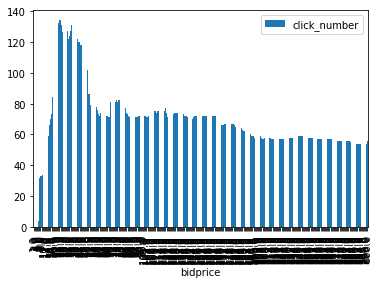

In [130]:
#plotting
#have not finished yet
df2.plot(x='bidprice', y='click_number',kind='bar')
plt.show()

# Random bidding (Rand)

In [11]:
import random

In [20]:
def ranran(low,rannum,df_range):
    budget = 6250000
    j=0
    up=low+rannum
    for b in range(len(df_range)):
        for i in range(low, up+1):
            a=np.random.randint(7,37)
            if (budget > 0) :
                if (a >= df_range.payprice.iloc[b] and a >= df_range.slotprice.iloc[b]) :
                    budget = budget - df_range.payprice.iloc[b] 
                #print('budget='+str(budget))
                
                
                    if (df_range.click.iloc[b] == 1) :
                        j = j +1
                        print('ranclick'+str(j))
                        print('budget='+str(budget))
                        break
                    
                    else :
                        break
    print('budget='+str(budget))
    

In [411]:
"""
budget = 6250000
j=0
lenth = 31
for b in range(len(df_range)):
    
    for i in range(lenth):
        a=np.random.randint(7,38)
        
        if (budget > 0) :
            if (a >= df_range.payprice.iloc[b] and a >= df_range.slotprice.iloc[b]) :
                budget = budget - df_range.payprice.iloc[b] 
                #print('budget='+str(budget))
                
                
                if (df_range.click.iloc[b] == 1) :
                    j = j +1
                    print('ranclick'+str(j))
                    print('budget='+str(budget))
                    break
                    
                else :
                    lenth=lenth-1
                    break
print('budget='+str(budget))

ranclick1
budget=6150068
ranclick2
budget=6120868
ranclick3
budget=6108859
ranclick4
budget=6051684
ranclick5
budget=6035040
ranclick6
budget=6013853
ranclick7
budget=5972998
ranclick8
budget=5917799
ranclick9
budget=5836769
ranclick10
budget=5761613
ranclick11
budget=5727038
ranclick12
budget=5665389
ranclick13
budget=5476113
ranclick14
budget=5453828
ranclick15
budget=5433220
ranclick16
budget=5364931
ranclick17
budget=5294275
ranclick18
budget=5220667
ranclick19
budget=5205622
ranclick20
budget=5178205
ranclick21
budget=5085154
ranclick22
budget=4914243
ranclick23
budget=4904513
ranclick24
budget=4799433
ranclick25
budget=4732758
ranclick26
budget=4705067
ranclick27
budget=4647947
ranclick28
budget=4609932
ranclick29
budget=4596157
ranclick30
budget=4575628
ranclick31
budget=4503877
ranclick32
budget=4493158
ranclick33
budget=4467246
ranclick34
budget=4377888
ranclick35
budget=4243355
ranclick36
budget=4228929
ranclick37
budget=4203505
ranclick38
budget=4191701
ranclick39
budget=414

In [21]:
def randomValu(low,rangevalue,df_range):
    budget = 6250000
    j=0
    up = low+rangevalue
    for b in range(len(df_range)):
        if (budget > 0) :
            a=np.random.randint(low,up+1)
            if (a >= df_range.payprice.iloc[b] and a >= df_range.slotprice.iloc[b]) :
                budget = budget - df_range.payprice.iloc[b] 
                #print('budget='+str(budget))
                
                
                if (df_range.click.iloc[b] == 1) :
                    j = j +1
                    #print('ranclick'+str(j))
                    #print('budget='+str(budget))
    return j
        
                    
                    
    


               
 #print('budget='+str(budget))

In [22]:
def randomVal1(x_low,y_range):
    teamnum = (300-x_low)//y_range
    
    result = np.zeros((teamnum,2))
    for i in range (teamnum) :
        result[i][1] = randomValu(x_low,y_range)
        result[i][0] = x_low
        x_low = x_low + y_range
        #print('processing low bound'+str(x_low))
    return result
        

In [431]:
ranResult = randomVal1(20,20)

processing low bound40
processing low bound60
processing low bound80
processing low bound100
processing low bound120
processing low bound140
processing low bound160
processing low bound180
processing low bound200
processing low bound220
processing low bound240
processing low bound260
processing low bound280
processing low bound300


In [23]:
def judge4(ran,df_ran):
    ranResult = randomVal1(10,ran)
    df_ran = pd.DataFrame(ranResult, columns = ['lower_bidprice', 'click_number',])


    df_ran = df_ran.sort_values('click_number',ascending=[False]).reset_index(drop=True)
    lower_bound = df_ran.lower_bidprice.iloc[0]
    upper_bound = lower_bound + ran
    click = df_ran.click_number.iloc[0]
    data = np.array([lower_bound, upper_bound, click])
    return data

In [439]:
judge4(20)

array([  30.,   50.,  118.])

In [440]:
result_ran = np.zeros((91,3)) 
for i in range(10,100):
    a=i-10
    result_ran[a,:] = judge4(i)

In [445]:
final_result = pd.DataFrame(result_ran, columns = ['lower_bound','upper_bound', 'click_number'])
lower_bound = final_result.lower_bound.iloc[0]
upper_bound = final_result.upper_bound.iloc[0]
click_number = final_result.click_number.iloc[0]
final_result.head()

,lower_bound,upper_bound,click_number
0,30.0,40.0,136.0
1,32.0,43.0,130.0
2,22.0,34.0,123.0
3,23.0,36.0,128.0
4,24.0,38.0,126.0


In [468]:
 final = final_result.sort_values('click_number',ascending=[False]).reset_index(drop=True)
final

,lower_bound,upper_bound,click_number
0,10.0,41.0,138.0
1,10.0,38.0,137.0
2,10.0,44.0,137.0
3,30.0,40.0,136.0
4,10.0,39.0,135.0
5,10.0,42.0,133.0
6,29.0,48.0,131.0
7,32.0,43.0,130.0
8,10.0,51.0,129.0
9,10.0,45.0,129.0


In [25]:
randomValu(30,130,df)

65

In [479]:
randomValu(10,30)

130

In [484]:
a2 = 0
for i in range(20):
    a2 = a2 + randomValu(10,28)
    print(str(a2))
a2 = a2/20
print(str(a2))

125
257
383
513
642
776
907
1047
1183
1316
1451
1581
1718
1857
1995
2133
2266
2392
2520
2669
133.45


In [488]:
a5 = 0
for i in range(20):
    a5 = a5 + randomValu(10,34)
    print(str(a5))
a5 = a5/20
print(str(a5))

133
257
395
517
653
779
905
1030
1164
1297
1418
1543
1672
1810
1946
2079
2197
2331
2460
2584
129.2


In [489]:
a6 = 0
for i in range(20):
    a6 = a6 + randomValu(30,10)
    print(str(a6))
a6 = a6/20
print(str(a6))

128
254
383
510
636
763
891
1020
1148
1274
1406
1531
1661
1784
1912
2044
2174
2306
2435
2566
128.3


In [492]:
a7 = 0
for i in range(20):
    a7 = a7 + randomValu(15,20)
    print(str(a7))
a7 = a7/20
print(str(a7))

139
277
414
547
689
825
962
1099
1238
1380
1522
1656
1803
1934
2076
2207
2348
2489
2614
2741
137.05


In [493]:
a8 = 0
for i in range(50):
    a8 = a8 + randomValu(10,28)
    


332.35


In [498]:
a8 = a8/50
print(str(a8))

135.6530612244898


In [501]:
print('The optimal biding range on trainning set:[15-35],click :' + str(a7)+ ' and range: [10-38], click :'+ str(a8) )

The optimal biding range:[15-35],click :137.05 and range: [10-38], click :135.6530612244898


In [473]:
"""
result_ran = np.zeros((8,3)) 
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
a8=0
for i in range(51):
    a1=a1+randomValu(10,31)
    a2=a2+randomValu(10,28)
    a3=a3+randomValu(10,34)
    a4=a4+randomValu(30,10)
    a5=a5+randomValu(10,29)
    a6=a6+randomValu(10,32)
    a7=a7+randomValu(29,19)
    a8=a8+randomValu(32,11)
    
re = np.array([a1/50,a2/50,a3/50,a4/50,a5/50,a67/50,a7/50,a8/50])    
    

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-473-2cb9a019d6f0>, line 22)